In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
manual_file = open("/content/gdrive/MyDrive/projectfolder/manual_keywords_rtfidf.txt",'r')
test_file = open('/content/gdrive/MyDrive/projectfolder/CharlestonFeb28_2020.txt','r')


In [23]:
file1 = open('/content/gdrive/MyDrive/projectfolder/largetext.txt','r')
file2 = open('/content/gdrive/MyDrive/projectfolder/CharlotteMar2_2020.txt','r')


manual_file1 = open("/content/gdrive/MyDrive/projectfolder/manual_keywords2.txt",'r')
manual_file2 = open("/content/gdrive/MyDrive/projectfolder/manual_keywords3.txt",'r')



In [4]:
pip install rake-nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize 
import math
import operator
from rake_nltk import Rake
from matplotlib import pyplot as plt  
import random
import time
r = Rake()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
def main(file1,manual_file):
  doc1 = file1.read()
  data_manual = manual_file.read()
  manual_phrases = data_manual.split("\n")
  manual_content_words = []
  for i in manual_phrases:
    w = i.split(" ")
    for j in w:
      if j not in manual_content_words:
        manual_content_words.append(j)
  doc=""
  for i in doc1:
    if i.isalpha():
      i=i.lower()
      doc+=i
    else:
      doc+=i


  total_sentences = sent_tokenize(doc)
  total_sent_len = len(total_sentences)
  total_words = word_tokenize(doc)
  total_word_len = len(total_words)


  tf_score = {}
  for each_word in total_words:
      each_word = each_word.replace('.','')
      if each_word not in stop_words:
          if each_word in tf_score:
              tf_score[each_word] += 1
          else:
              tf_score[each_word] = 1

  # Dividing by total_word_length for each dictionary element
  tf_score.update((x, y/int(total_word_len)) for x, y in tf_score.items())

  def check_sent(word, sentences): 
      final = [all([w in x for w in word]) for x in sentences] 
      sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
      return int(len(sent_len))

  idf_score = {}
  for each_word in total_words:
      each_word = each_word.replace('.','')
      if each_word not in stop_words:
          if each_word in idf_score:
              idf_score[each_word] = check_sent(each_word, total_sentences)
          else:
              idf_score[each_word] = 1

  removes=[]

  for x, y in idf_score.items():
    if int(y)==0:
      removes.append(x)
  for i in removes:
    idf_score.pop(i)
  # Performing a log and divide
  idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

  tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()}

  tfidf_content_words=[]
  for i in tf_idf_score.keys():
    if i not in tfidf_content_words:
      tfidf_content_words.append(i)

  rake_content_words = []
  def rake_algorithm(data):
    r = Rake()
    r.extract_keywords_from_text(data)
    y=r.get_ranked_phrases()
    t=r.get_ranked_phrases_with_scores()
    for i in y:
      w = i.split(" ")
      for j in w:
        if j not in rake_content_words:
          rake_content_words.append(j)
  rake_algorithm(doc)
  similar_words_rake = []
  similar_words_tfidf=[]
  for i in tfidf_content_words:
    for j in manual_content_words:
      if i==j:
        if i not in similar_words_tfidf:
          similar_words_tfidf.append(i)
  for i in rake_content_words:
    for j in manual_content_words:
      if i==j:
        if i not in similar_words_rake:
          similar_words_rake.append(i)
  rake_similar = (len(similar_words_rake)/len(manual_content_words))*100
  tf_idf_similar = (len(similar_words_tfidf)/len(manual_content_words))*100
  return [tf_idf_similar,rake_similar]
  
  


In [26]:
res = main(test_file,manual_file)
print("RAKE accuracy:")
print(res[1])
print("CF accuracy:")
print(res[0])

RAKE accuracy:
74.48979591836735
CF accuracy:
64.28571428571429


In [27]:
import numpy as np
import matplotlib.pyplot as plt


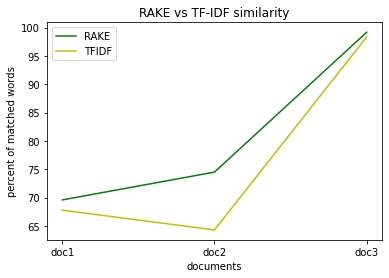

In [28]:
res1 = main(file2,manual_file2)
res3 = main(file1,manual_file1)
x=["doc1","doc2","doc3"]
y1 = [res1[0],res[0],res3[0]]
y2 = [res1[1],res[1],res3[1]]
plt.plot(x, y2,label="RAKE", color='g')
plt.plot(x, y1,label="TFIDF", color='y')
plt.xlabel("documents")
plt.ylabel("percent of matched words")
plt.title('RAKE vs TF-IDF similarity') 
plt.legend(loc='upper left')
plt.show();

In [33]:
from nltk import tokenize

data1= open('/content/gdrive/MyDrive/projectfolder/CharlestonFeb28_2020.txt','r').read()

def main_c(txt):
        stop_words=set(stopwords.words('english'))
        sentences = txt.split(".")
        noOfSentences= int(len(sentences)*(1/4))
        #print(sentences)

        #user wants to reduce the content to "no_sentences" lines.                    
        def summarize(text,no_sentences):
                word_weights={}
                for word in word_tokenize(text):
                        word=word.lower()
                        if len(word) >1 and word not in stop_words:
                            if word in word_weights.keys():
                                word_weights[word]+=1
                            else:
                                word_weights[word]=1
                sentence_weights={}
                for sent in tokenize.sent_tokenize(text):
                        sentence_weights[sent]=0
                        for word in word_tokenize(sent):
                            word=word.lower()
                            if word in word_weights.keys():
                                sentence_weights[sent]+=word_weights[word]
                highest_weights = sorted(sentence_weights.values())[-no_sentences:] # draw the graphs for the highest words and highest weighted sentences
                summary=""
                for sentence,strength in sentence_weights.items():
                        if strength in highest_weights:
                            summary+=sentence+" "
                summary = summary.replace("_"," ").strip()
                return summary

        all_reducetext1=summarize(txt,noOfSentences)
        sentences=all_reducetext1.split(".")
        return sentences
R = main_c(data1)
print(main_c(data1))

["Hello Charleston, and I'm thrilled to be back in the great state of South Carolina with thousands of hardworking American Patriots who believe in faith, family, God, and country", " It's a phenomenal crowd, only topped by the number of people outside that didn't get in", " Then let's begin, right? They're trying to get to a hundred, but they're not going to make it", " Well, that's what they do", " No, it's crazy", " It's a crazy deal", " That's a lot of cameras", " That's a lot of cameras, Lindsey and Tim, that's a lot of… They heard you guys were here", ' They heard Tim was here and that Lindsey was here and that… And they said, "We\'re not going to attend that rally," but when we heard those two guys plus our great congressmen, they\'re here, great congressmen', " We're thrilled to be in the midst of what we call the Great American Comeback and that's what it is", ' They have spent the last three years, and I can even go further than that, three years since the election, but we go

In [30]:
from graphviz import Digraph
g = Digraph('unix', filename='concept-map2',node_attr={'color': 'lightblue2', 'style': 'filled','shape': 'box'})

for i in range(len(R)-1):
  if len(R[i+1])>1:
    g.edge(R[i],R[i+1])
g.view()

'concept-map2.pdf'

In [31]:
from google.colab import files
files.download('concept-map2.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>